In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
import keras.optimizers as optimizers
from keras.layers import Dense, Input
tf.random.set_seed(42)

2-D Debris Flow Equation:
$$\frac{\partial{h}}{\partial t}+\frac{\partial uh}{\partial x}+\frac{\partial vh}{\partial y}=i$$

In [2]:
#Se define la ecuacion de debris flow en 2D
def debris_flow(x, y, t, h, u, v):
    i = tf.gradients(h,t)[0] + tf.gradients(h*u,x)[0] + tf.gradients(h*v,y)[0]
    return i

In [3]:
def initial_condition(x, y):
    return tf.exp(-0.1 * (x**2 + y**2))

In [4]:
# Generar puntos de datos para x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
X_flatten, Y_flatten = X.flatten(), Y.flatten()

h = 1905

In [8]:
input = np.stack([X_flatten, Y_flatten], axis=-1)
target = initial_condition(X_flatten, Y_flatten).numpy()

ep = 100
pv = 0.2
opt = optimizers.Adam(learning_rate=0.01)

inputs  = Input(shape=(2,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)

output = Dense(1, activation='linear')(hidden3)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])
model.fit(input, target, epochs=ep, validation_split=pv)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0229 - mae: 0.0688 - val_loss: 0.0053 - val_mae: 0.0646
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7445e-04 - mae: 0.0097 - val_loss: 0.0015 - val_mae: 0.0318
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0960e-04 - mae: 0.0078 - val_loss: 6.9994e-04 - val_mae: 0.0212
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6527e-05 - mae: 0.0065 - val_loss: 0.0010 - val_mae: 0.0264
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5617e-05 - mae: 0.0069 - val_loss: 3.7547e-04 - val_mae: 0.0158
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5238e-05 - mae: 0.0073 - val_loss: 4.3873e-04 - val_mae: 0.0172
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0172e-04 - mae: 0.0074 - val_loss: 4.3228e-04 - val_mae: 0.0169
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9766e-05 - mae: 0.0072 - val_loss: 2.6444e-04 - val_mae: 0.0138


In [10]:
# Predicción con la red entrenada
predictions = model.predict(input).reshape(X.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


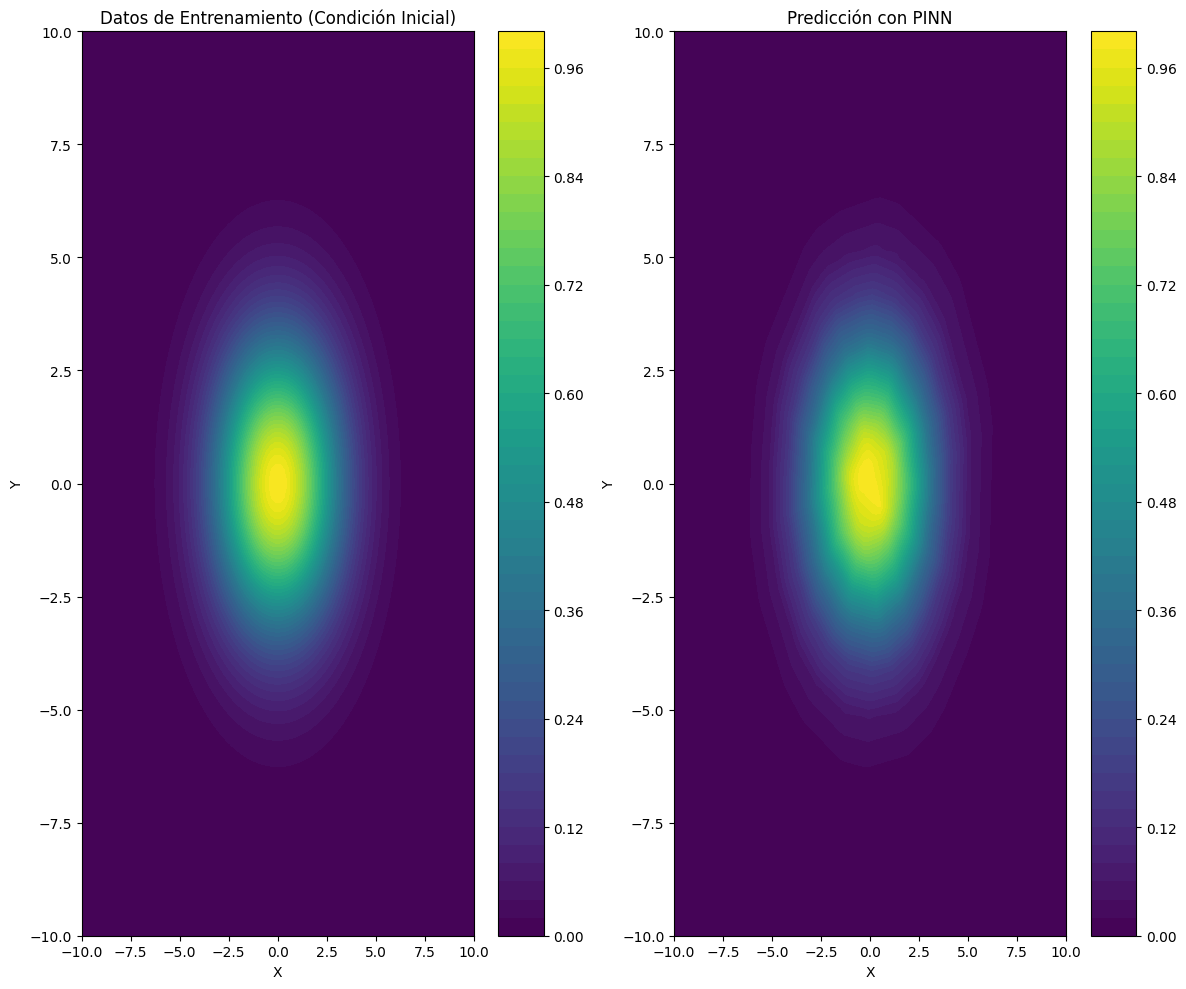

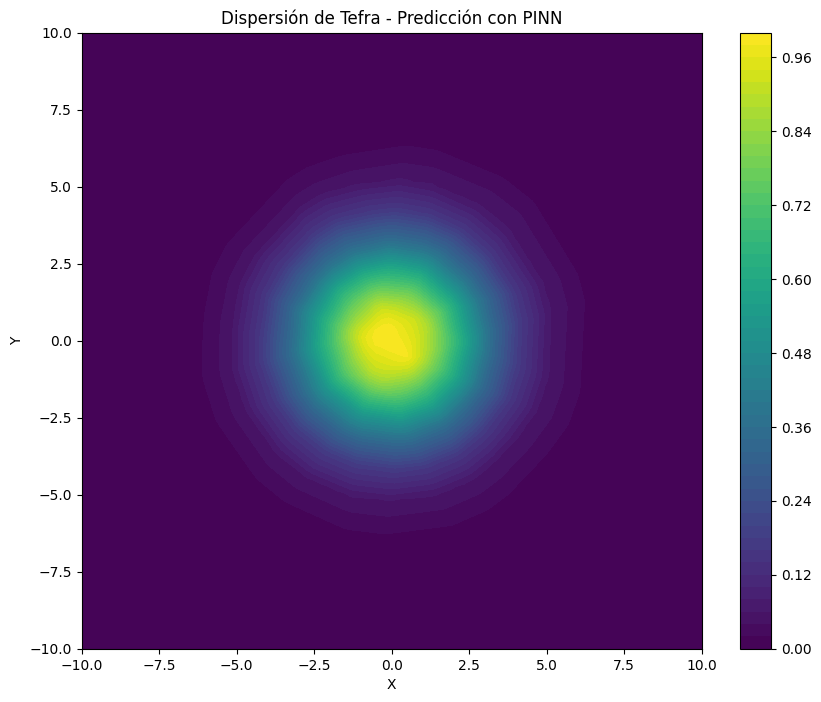

In [11]:
# Visualización de resultados
plt.figure(figsize=(12, 10))

# Gráfico de datos de entrenamiento (Condición inicial)
plt.subplot(1, 2, 1)
plt.contourf(X, Y, target.reshape(X.shape), levels=50, cmap='viridis')
plt.colorbar()
plt.title('Datos de Entrenamiento (Condición Inicial)')
plt.xlabel('X')
plt.ylabel('Y')

# Gráfico de predicción con PINN
plt.subplot(1, 2, 2)
plt.contourf(X, Y, predictions, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Predicción con PINN')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, predictions, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Dispersión de Tefra - Predicción con PINN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
